In [1]:
import sys

!git clone https://github.com/TUIlmenauAMS/Python-Audio-Coder

currentpath=sys.path[0]
sys.path.append(currentpath+'/Python-Audio-Coder')
sys.path.append(currentpath+'/PsychoacousticLoss')
sys.path.append(currentpath+'/Python-Audio-Coder/PythonPsychoacoustics')

import os
import scipy.io.wavfile as wav 
import matplotlib.pyplot as plt
from IPython.display import Audio
from pydub import AudioSegment
from pydub.playback import play
import psyacloss
import numpy as np

fatal: destination path 'Python-Audio-Coder' already exists and is not an empty directory.


In [3]:
wav_files = [f for f in os.listdir(os.path.join(currentpath, 'output')) if f.endswith('.wav')]

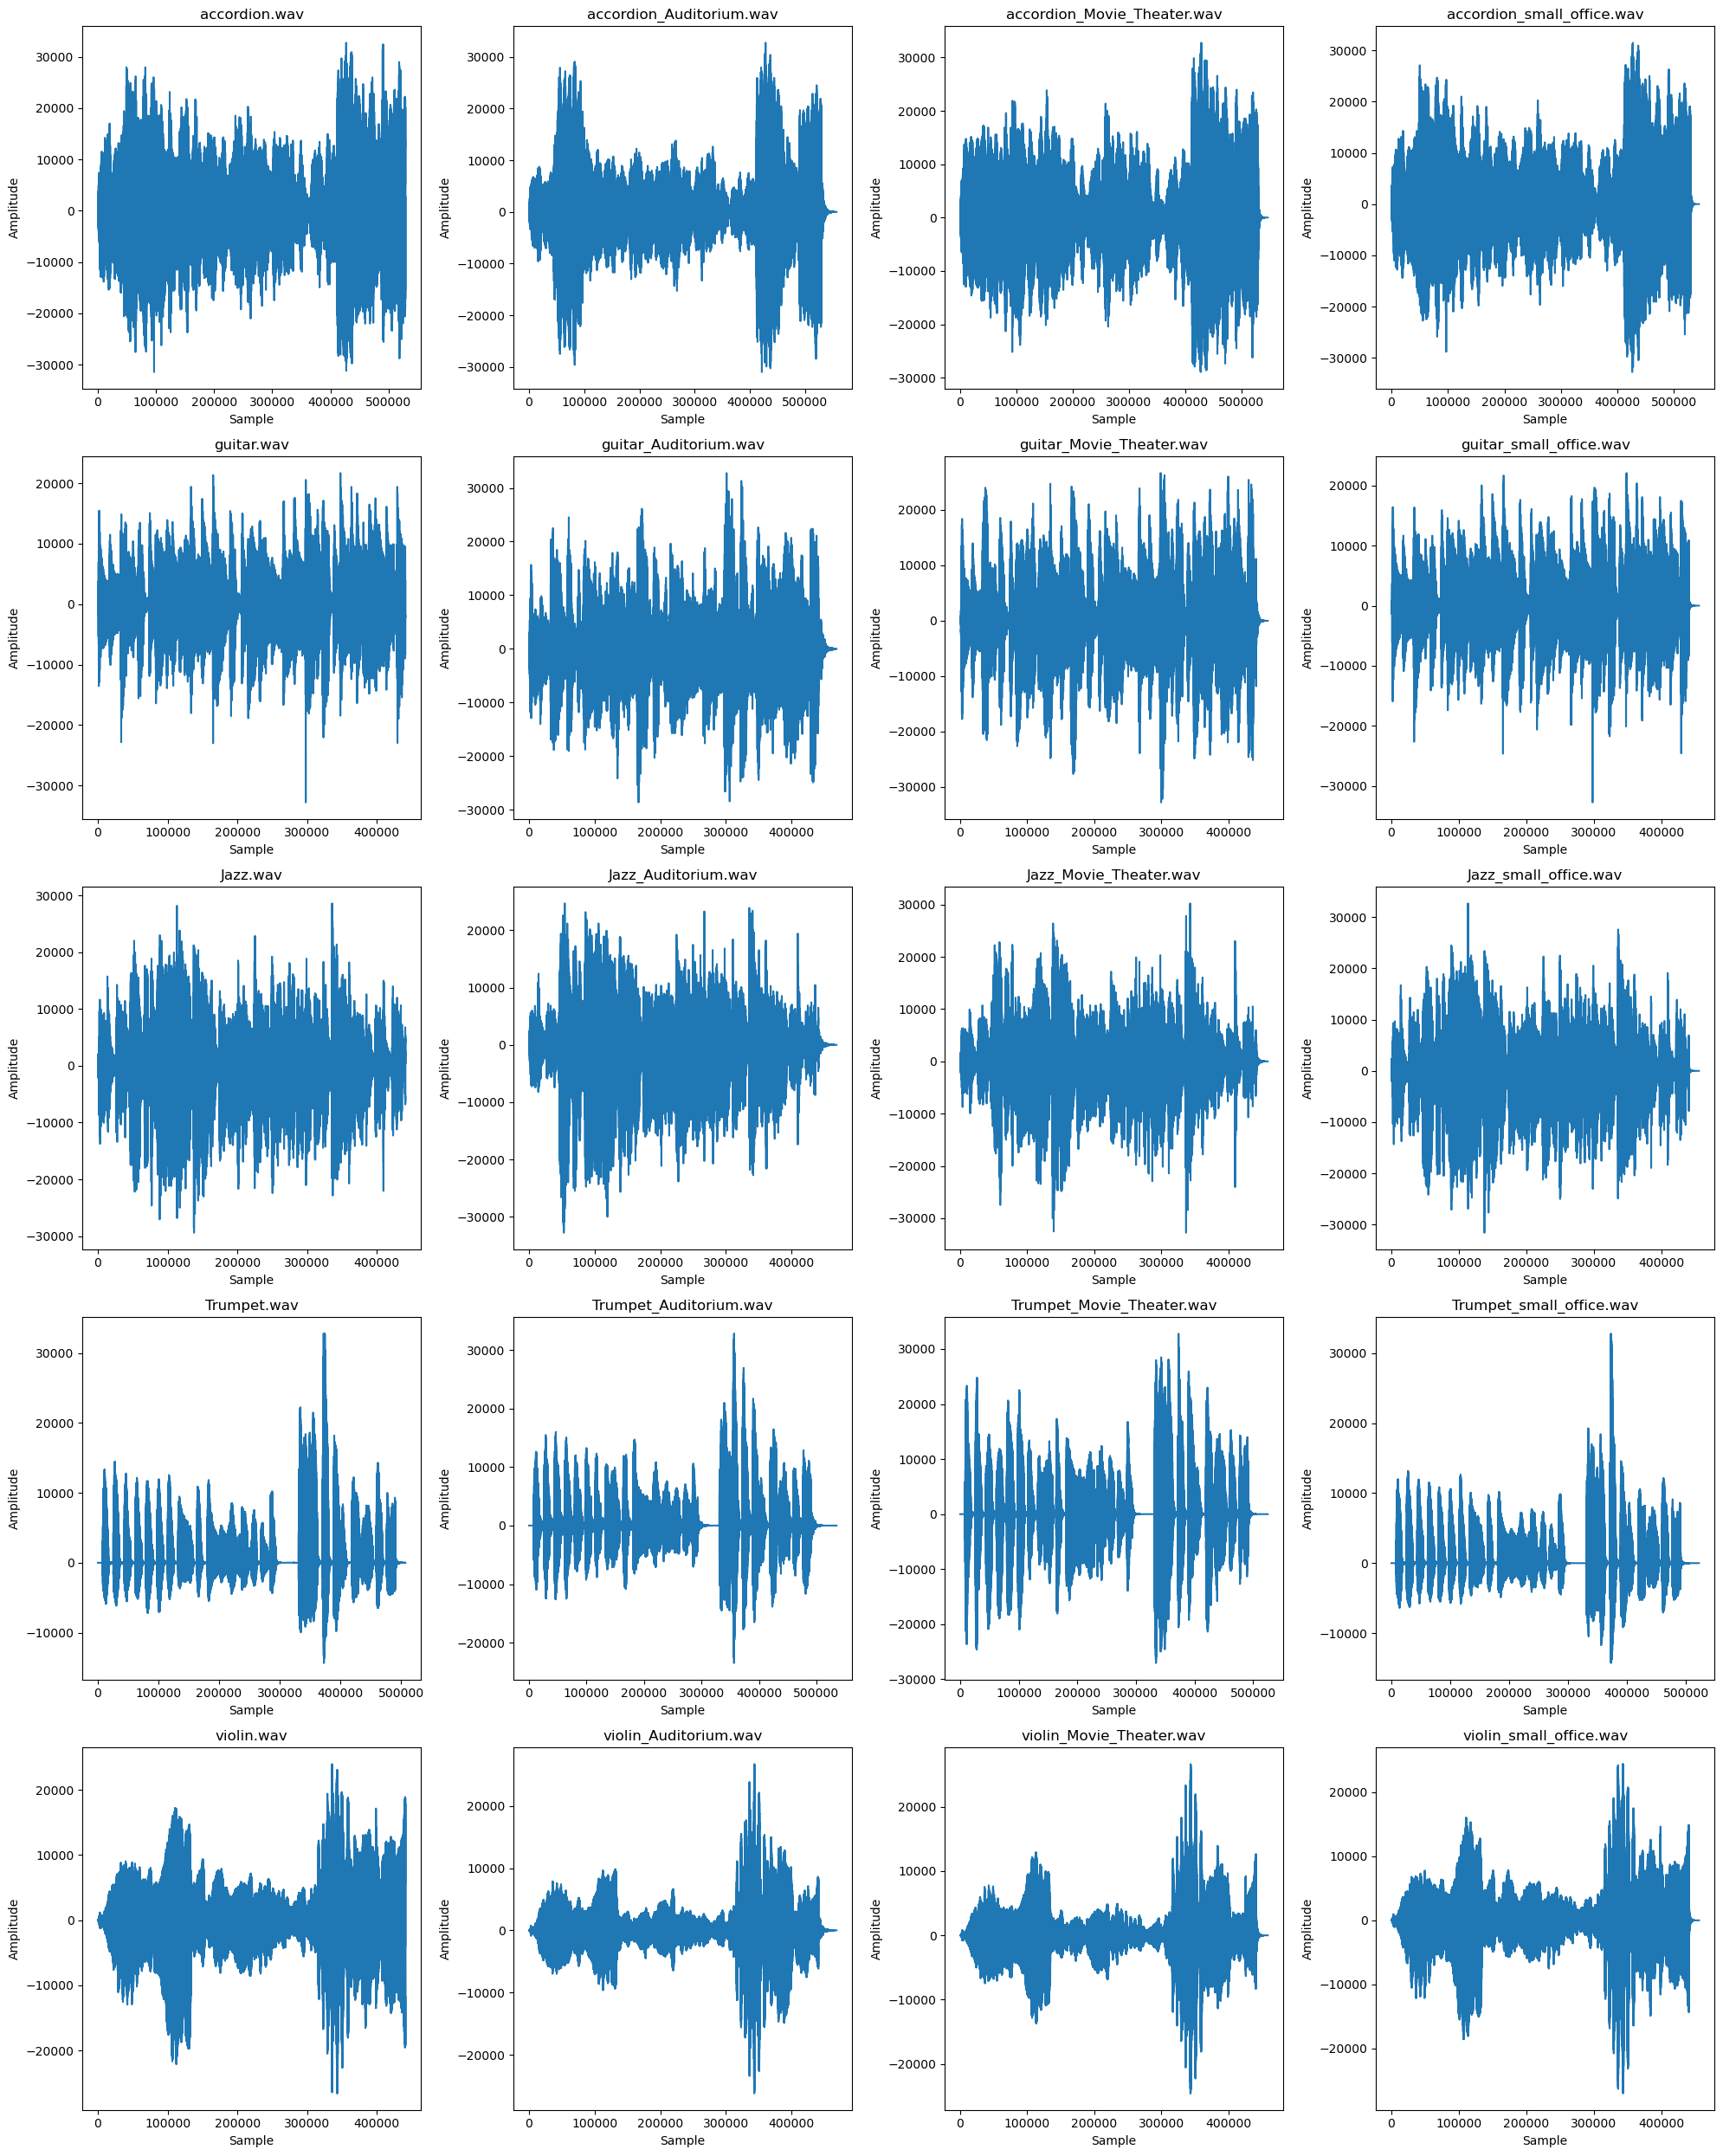

In [5]:
n_files = len(wav_files)
n_cols = 4
n_rows = int(np.ceil(n_files / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

axes = axes.flatten()

for i, wav_file in enumerate(wav_files):
    fs, data = wav.read(os.path.join(currentpath, 'output', wav_file))
    axes[i].plot(data[:,1])
    axes[i].set_title(wav_file)
    axes[i].set_xlabel('Sample')
    axes[i].set_ylabel('Amplitude')
    
for ax in axes[n_files:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


In [6]:
accordian = []
violin = []
guitar = []
trumpet = []
jazz = []

for wav_file in wav_files:
    if wav_file.startswith('accordion'):
        accordian.append(wav_file)
    elif wav_file.startswith('violin'):
        violin.append(wav_file)
    elif wav_file.startswith('guitar'):
        guitar.append(wav_file)
    elif wav_file.startswith('Trumpet'):
        trumpet.append(wav_file)
    elif wav_file.startswith('Jazz'):
        jazz.append(wav_file)
print(accordian)
print(violin)
print(guitar)
print(trumpet)
print(jazz)

['accordion.wav', 'accordion_Auditorium.wav', 'accordion_Movie_Theater.wav', 'accordion_small_office.wav']
['violin.wav', 'violin_Auditorium.wav', 'violin_Movie_Theater.wav', 'violin_small_office.wav']
['guitar.wav', 'guitar_Auditorium.wav', 'guitar_Movie_Theater.wav', 'guitar_small_office.wav']
['Trumpet.wav', 'Trumpet_Auditorium.wav', 'Trumpet_Movie_Theater.wav', 'Trumpet_small_office.wav']
['Jazz.wav', 'Jazz_Auditorium.wav', 'Jazz_Movie_Theater.wav', 'Jazz_small_office.wav']


In [9]:
import torch
import psyacloss_torch

def per_loss(aud1, aud2):
    min_length = min(aud1.shape[0], aud2.shape[0])

    snd1 = aud1[:min_length]
    snd2 = aud2[:min_length]

    ploss=psyacloss_torch.percloss(torch.from_numpy(snd1[:, 0]).float(), torch.from_numpy(snd2[:, 0]).float(), fs = 2 * np.pi)
    
    return ploss

In [23]:
import csv

def audio_loss(list_of_files):

    fig, axes = plt.subplots(3, 1, figsize=(10, 5 * 3))
    losses = []

    for i, wav_file in enumerate(list_of_files):
        file_path = os.path.join(currentpath, 'output', wav_file)
        if wav_file == str(list_of_files[0]):
            fs, org = wav.read(file_path)
            
        else:
            fs, snd = wav.read(file_path)
        if i > 0:
            loss = per_loss(org, snd)
            print(f'Loss between {wav_file} and {list_of_files[0]} is {loss}')
            losses.append((wav_file, float(loss)))
            axes[i-1].plot(org[:, 0])
            axes[i-1].plot(snd[:, 0],alpha=0.8)
            axes[i-1].set_title(f'Original vs. {wav_file}')  

        
    for ax in axes[n_files:]:
        fig.delaxes(ax)  
            
    plt.tight_layout()
    plt.show()
    csv_file_path = os.path.join(currentpath, 'output', 'losses.csv')
    file_exists = os.path.isfile(csv_file_path)
    
    with open(csv_file_path, mode='a', newline='') as file:
        writer = csv.writer(file)
        if not file_exists:
            writer.writerow(['File', 'Loss'])
        writer.writerows(losses)
    
    print(f'Losses saved to {csv_file_path}')
           

Loss between Trumpet_Auditorium.wav and Trumpet.wav is 0.7197317481040955
Loss between Trumpet_Movie_Theater.wav and Trumpet.wav is 1.0732700824737549
Loss between Trumpet_small_office.wav and Trumpet.wav is 0.20523206889629364


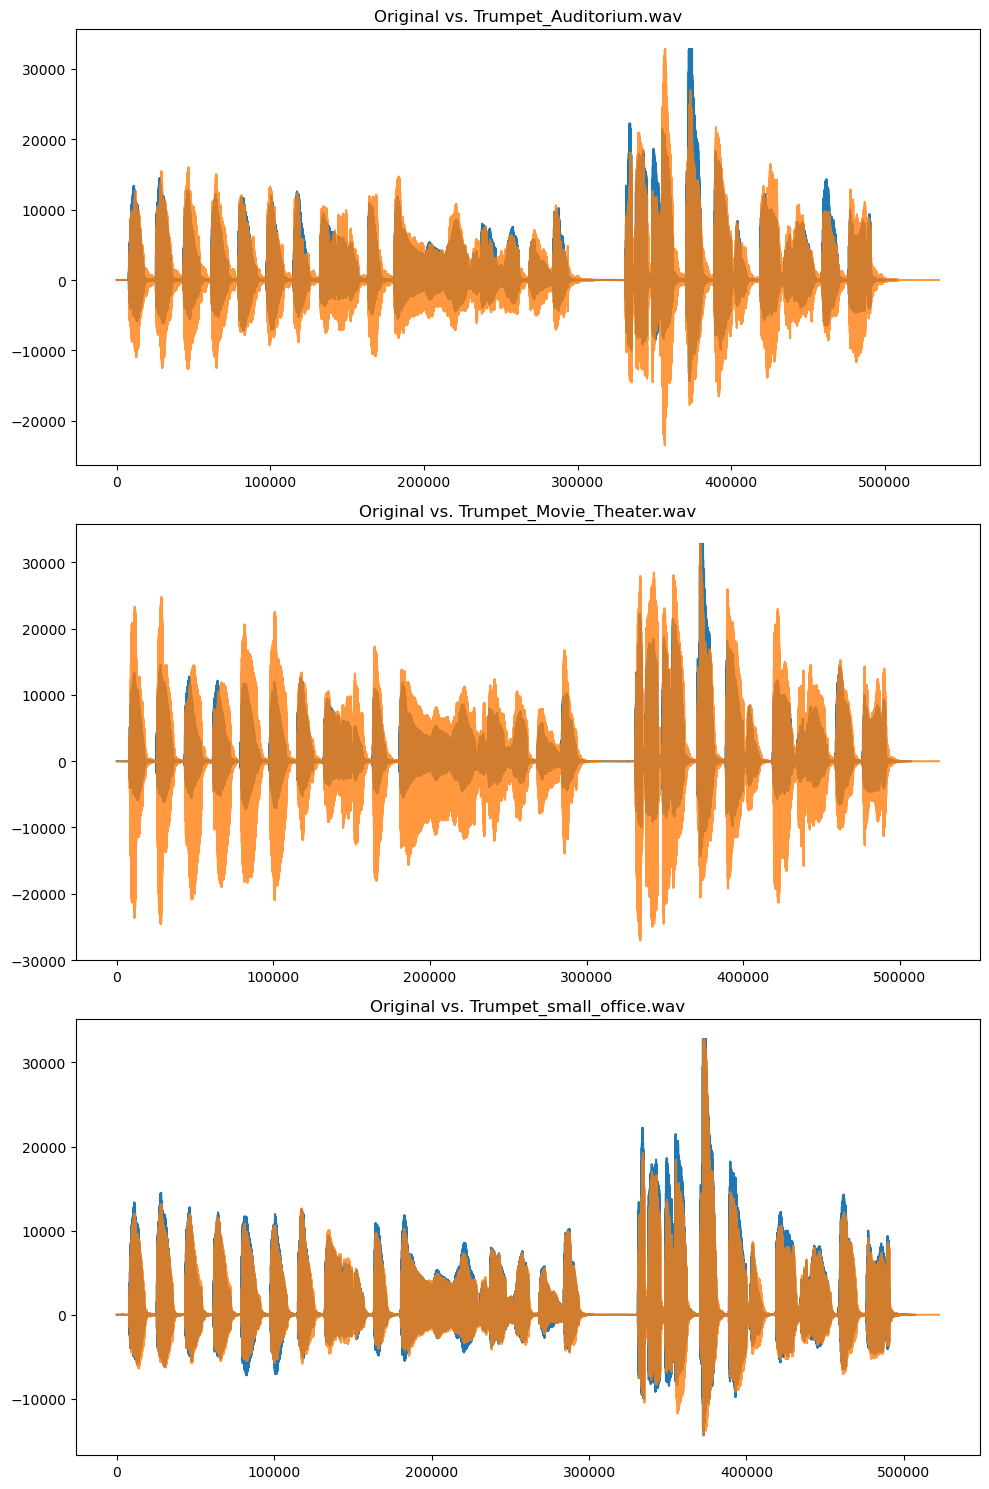

Losses saved to d:\TUI\SS 2024\Multirate Signal Processing\Task2\output\losses.csv


In [24]:
audio_loss(trumpet)

Loss between violin_Auditorium.wav and violin.wav is 0.10469430685043335
Loss between violin_Movie_Theater.wav and violin.wav is 0.18732117116451263
Loss between violin_small_office.wav and violin.wav is 0.22239354252815247


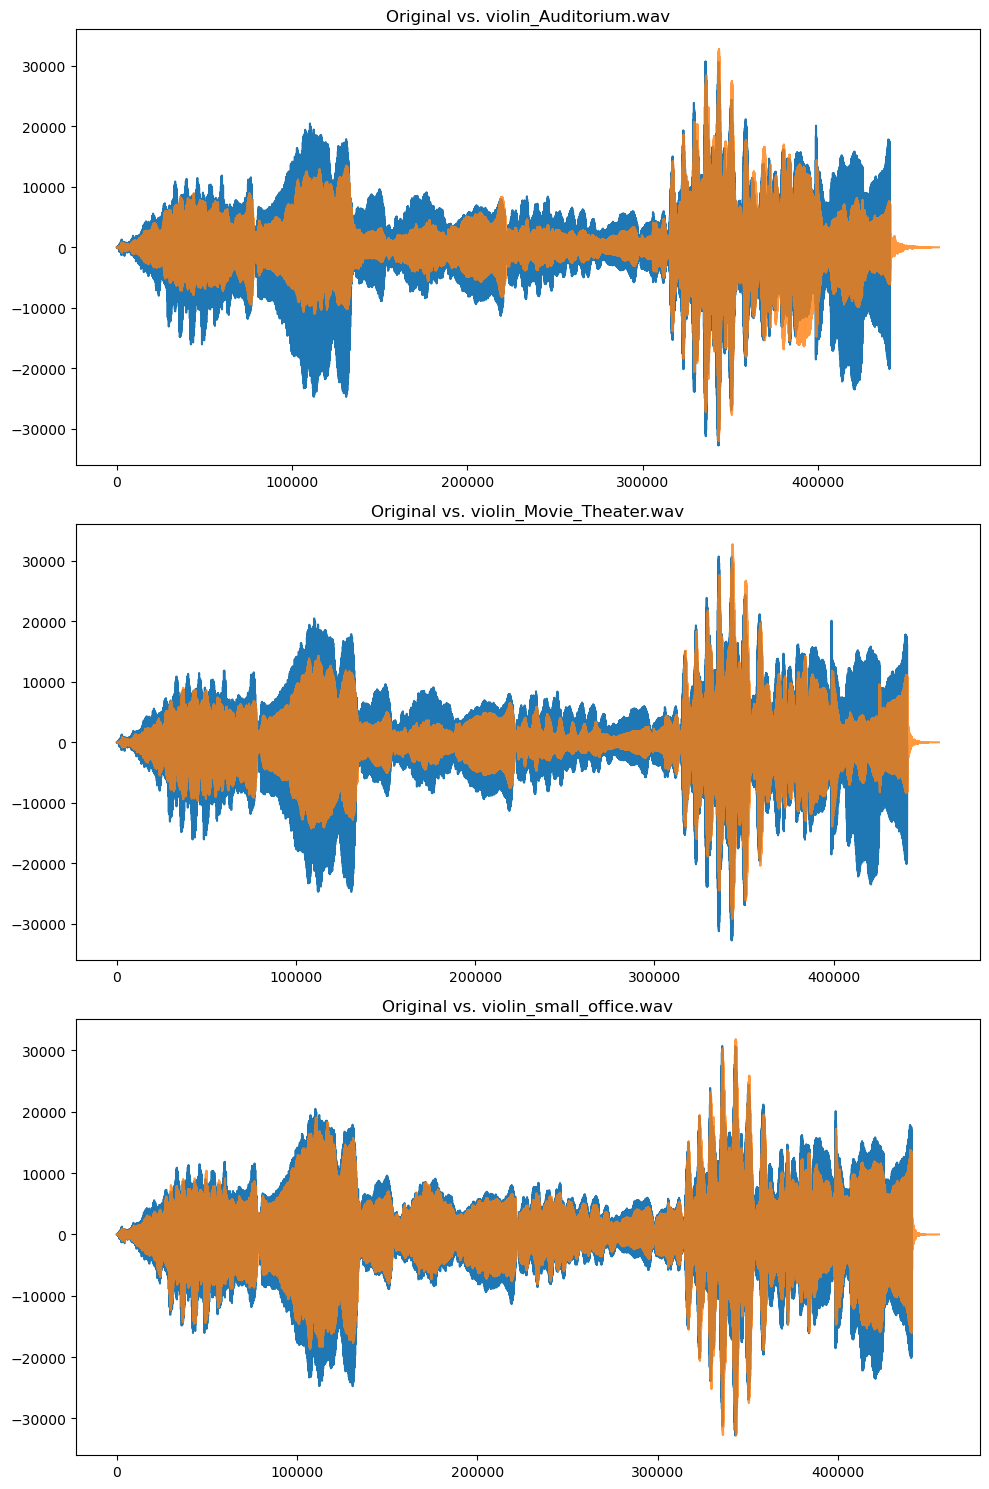

Losses saved to d:\TUI\SS 2024\Multirate Signal Processing\Task2\output\losses.csv


In [25]:
audio_loss(violin)

Loss between guitar_Auditorium.wav and guitar.wav is 0.8068163990974426
Loss between guitar_Movie_Theater.wav and guitar.wav is 0.4993216395378113
Loss between guitar_small_office.wav and guitar.wav is 0.32715359330177307


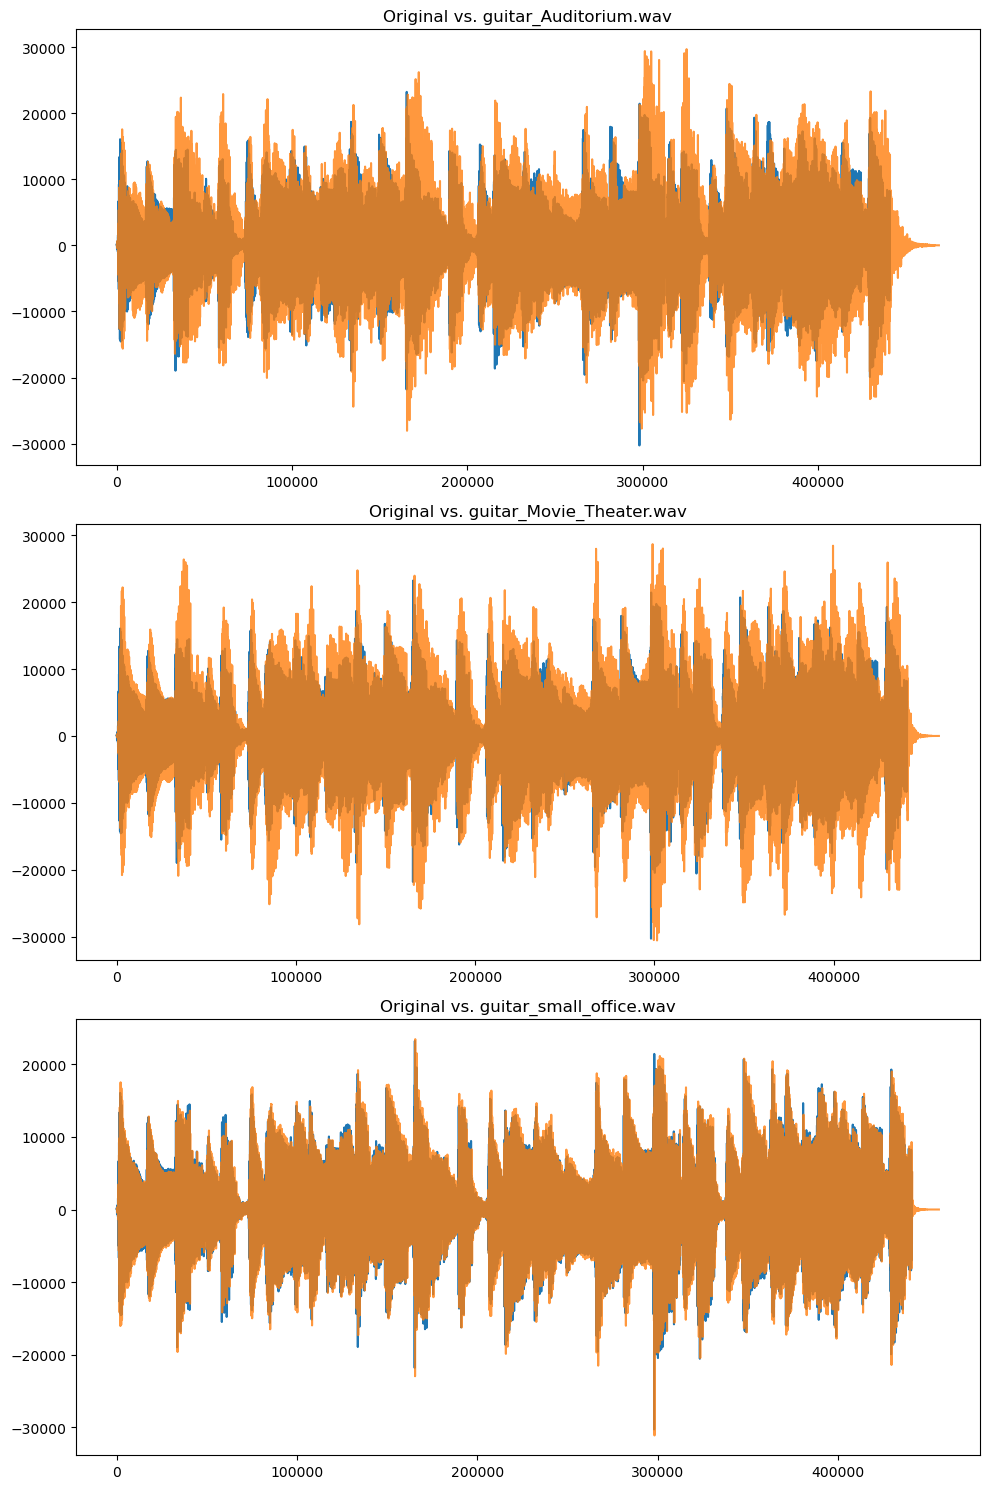

Losses saved to d:\TUI\SS 2024\Multirate Signal Processing\Task2\output\losses.csv


In [26]:
audio_loss(guitar)

Loss between accordion_Auditorium.wav and accordion.wav is 0.21468669176101685
Loss between accordion_Movie_Theater.wav and accordion.wav is 0.18567124009132385
Loss between accordion_small_office.wav and accordion.wav is 0.2827901840209961


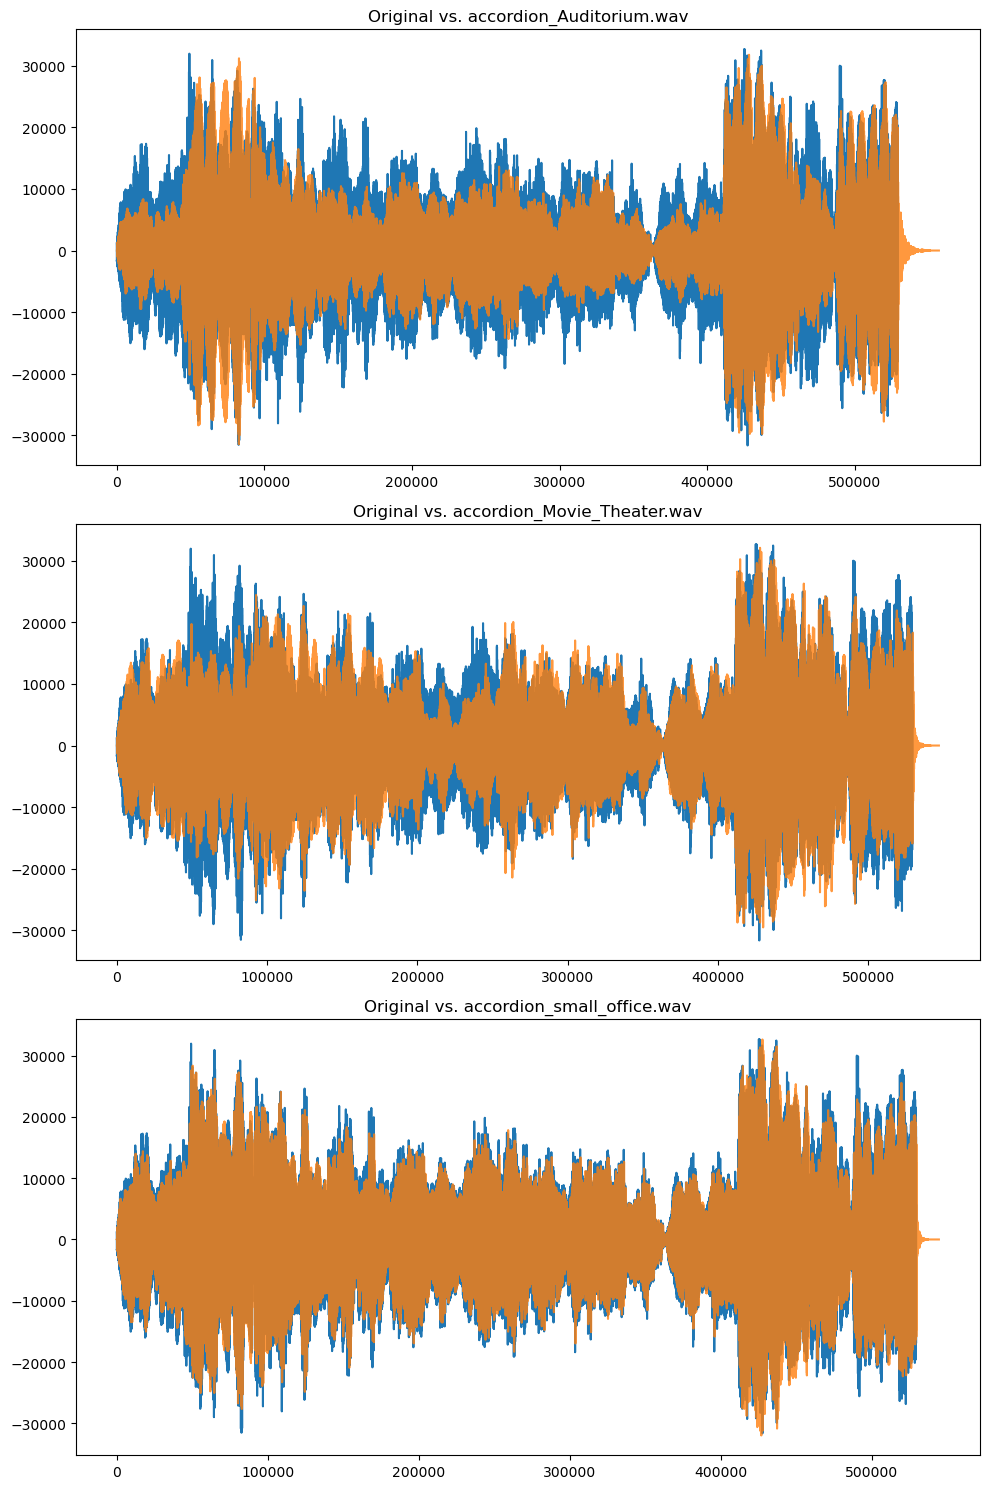

Losses saved to d:\TUI\SS 2024\Multirate Signal Processing\Task2\output\losses.csv


In [27]:
audio_loss(accordian)

Loss between Jazz_Auditorium.wav and Jazz.wav is 0.16226251423358917
Loss between Jazz_Movie_Theater.wav and Jazz.wav is 0.15443667769432068
Loss between Jazz_small_office.wav and Jazz.wav is 0.21999402344226837


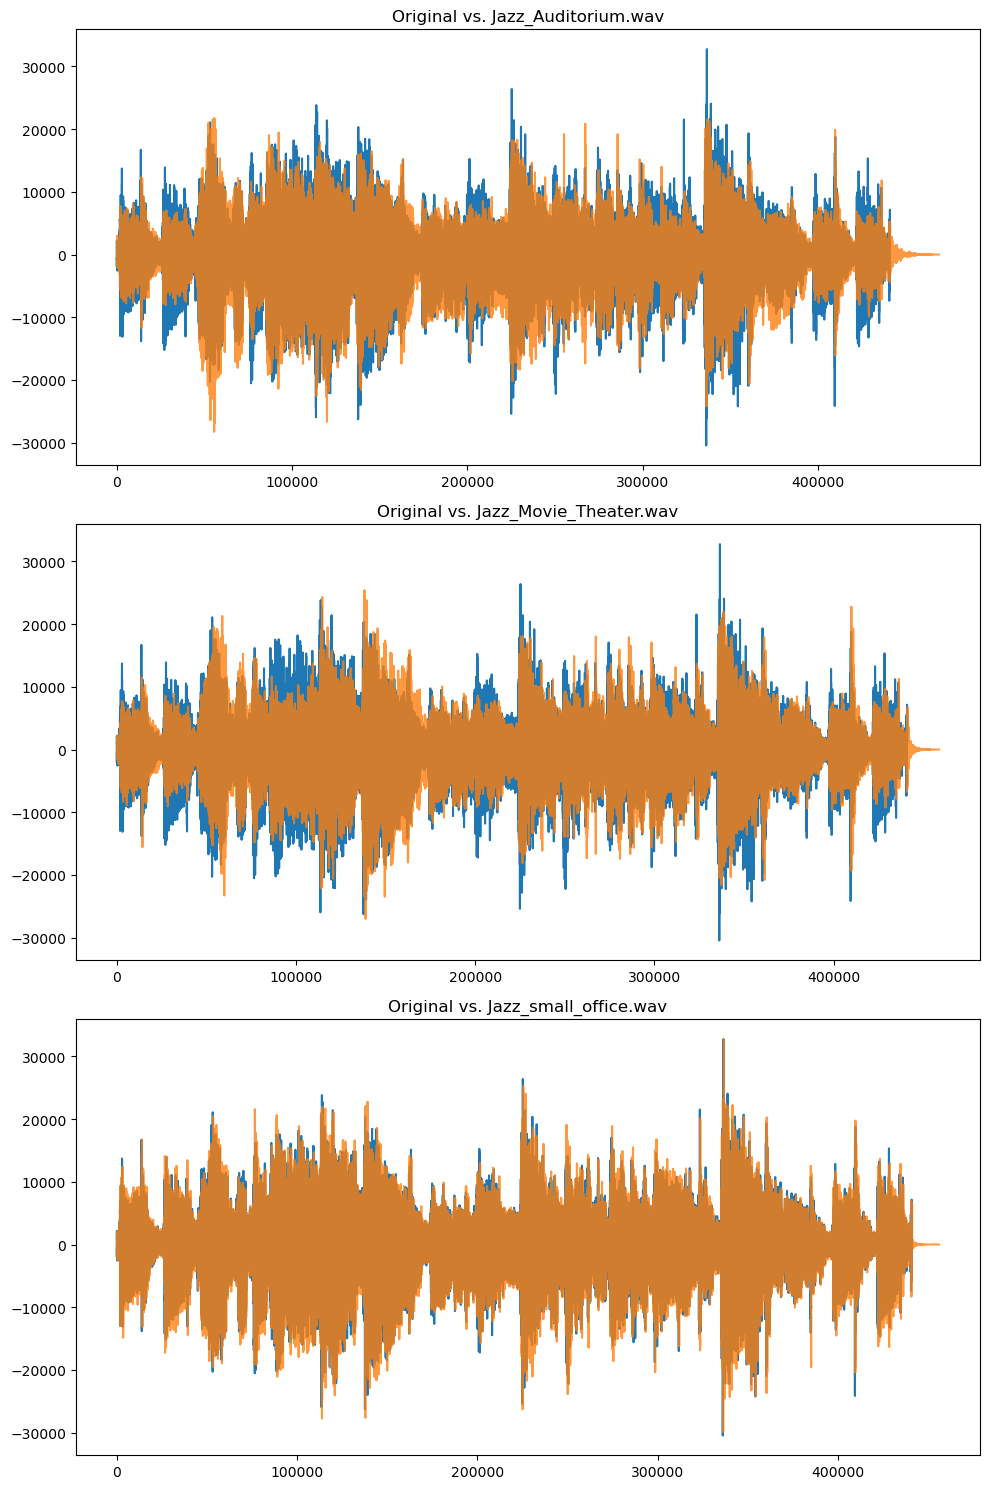

Losses saved to d:\TUI\SS 2024\Multirate Signal Processing\Task2\output\losses.csv


In [28]:
audio_loss(jazz)